# Inaugural Project

Imports and set magics:

In [3]:
import numpy as np 
from scipy import optimize 
from matplotlib import pyplot as plt 
plt.style.use("seaborn") 



# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


# Question 1

We start off by defining the utility function, the budget constraint and the equilibrium condition (stating that consumption must equal the income). We then use the function optimize.minimize_scalar from scipy in order to maximize the consumer problem. Notice that the utility outcome of the equilibirum condition is negtive, which is necessary as we are using a minimizing function. Our maximizing function "solves" the problem by firstly determining the labour supply, which makes it possible to determine consumption and then finally determines the utility. Our output is as follows:
The optimal units of labor is 0.339, The optimal units of consumption is 1.101, The maximum utility is 0.075


In [4]:

# parameter values as given
m = 1  
v = 10 
epsilon = 0.3 
tau_0 = 0.4 
tau_1 = 0.1 
k = 0.4 

# utility function 
def utility(c,v,l,epsilon):
    """ Calculating utility
    
    Args:
    
        c (float)         : consumption
        v (integer)       : scalar for disutility of labour
        l (float)         : labour supply
        epsilon (integer) : Frisch elasticity
        
    Returns:
    
        u_out (float): utility
    
    """
    u_out = np.log(c) - v* ((l**(1+1/epsilon))/(1+1/epsilon)) 
    return u_out


In [5]:
# budget constraint
def budget_constraint(m,w,l,tau_0,tau_1,k):
    """ Calculating budget constraint
    
    Args:
    
        m (integer)  : cash-on-hand
        w (float)    : wage rate
        l (float)    : labour supply
        tau_0 (float): standard labor income tax
        tau_1 (float): top bracket labor income tax
        k (float)    : cut-off for top labor income tax
        
    Returns:
    
        b_out (float): Budget constraint
    
    """
    b_out = m + (w*l) - (tau_0*w*l  +tau_1*np.fmax(w*l-k , 0)) 
    return b_out


In [6]:
# equilibrium
def equilibrium(l, w, epsilon, v, tau_0, tau_1, k):
    """ Defining the equilibrium condition and returning the negative utility that has to be minimized
    
    Args:
    
        l (float)        : labour supply
        w (float)        : wage rate
        epsilon (integer): Frisch elasticity
        v (integer)      : scalar for disutility of labor
        tau_0 (float)    : standard labor income tax
        tau_1 (float)    : top bracket labor income tax
        k (float)        : cut-off for top labor income tax
    
        
    Returns:
    
        -utility (float): negative utility as function of consumption
    
    """
    c = budget_constraint(m,w,l,tau_0,tau_1,k) 
    return -utility(c,v,l,epsilon)


In [7]:
# call solver
def solve(w, epsilon, v, tau_0, tau_1, k, m): 
    """ Calculating optimal labour supply and consumption
    
    Args:

        w (float)        : wage rate
        epsilon (integer): Frisch elasticity
        v (integer)      : scalar for disutility of labor
        tau_0 (float)    : standard labor income tax
        tau_1 (float)    : top bracket labor income tax
        k (float)        : cut-off for top labor income tax
        m (integer)      : cash-on-hand
        
    Returns:
    
        l_star,c_star,u_star (float): Optimal labour supply, optimal consumption and Utility
    
    """
    solution = optimize.minimize_scalar(
    equilibrium,  method='bounded',
    bounds=(0, 1), args=(w,epsilon, v, tau_0,tau_1,k))

    # solution
    l_star = solution.x
    c_star = budget_constraint(m, w, l_star,tau_0,tau_1,k)
    u_star = utility(c_star,v,l_star,epsilon)
    return l_star,c_star,u_star

l_star = solve(0.5, epsilon, v , tau_0, tau_1, k, m)[0]

c_star = solve(0.5, epsilon, v , tau_0, tau_1, k, m)[1]    

u_star = solve(0.5, epsilon, v , tau_0, tau_1, k, m)[2]        

print("We get the following results:")
print(f"The optimal units of labor is {l_star:.3f}")
print(f"The optimal units of consumption is {c_star:.3f}")
print(f"The maximum utility is {u_star:.3f}")

We get the following results:
The optimal units of labor is 0.339
The optimal units of consumption is 1.102
The maximum utility is 0.076


# Question 2

We start off by generating a vector of 10000 values in the line space between 0.5 and 1.5. This is the wage span. We then create two empty arrays and loop the different values of wage through the maximixation function into these arrays.


In [8]:

# set of vector values
N = 10000
wage_range = np.linspace(0.5, 1.5, N) 
labour_range = np.empty(N) 
consumption_range = np.empty(N)

# looping values through solver and plugging into to empty arrays.
for i, w in enumerate(wage_range):
    sol = solve(w, epsilon, v, tau_0, tau_1, k, m) 
    labour_range[i] = sol[0]
    consumption_range[i] = sol[1]


We then finally use the plt.figure function from matplotlib in order to illustrate the optimal labour supply and optimal consumption.
Our results are illustrated below.

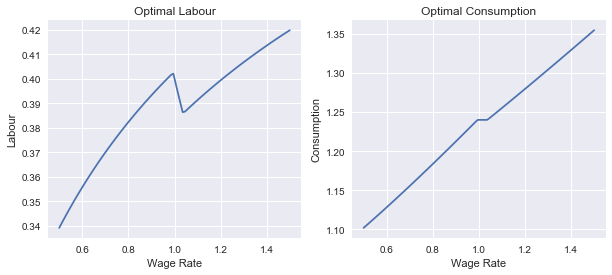

In [15]:
figure = plt.figure(figsize=(10,4)) 

# left plot - labor
ax_left = figure.add_subplot(1,2,1)
ax_left.plot(wage_range, labour_range)
ax_left.set_title("Optimal Labour")
ax_left.set_xlabel("Wage Rate")
ax_left.set_ylabel("Labour")
ax_left.grid(True)


# right plot - consumption
ax_right = figure.add_subplot(1,2,2)
ax_right.plot(wage_range, consumption_range)
ax_right.set_title("Optimal Consumption")
ax_right.set_xlabel("Wage Rate")
ax_right.set_ylabel("Consumption")
ax_right.grid(True)

# print of results
plt.show;

We see that due to the top bracket labour income tax, the labour as a function wage has a kink before it rises again when the higher tax rate kicks in. The value of kappa, k, determines where the cut off for the top labour bracket. Similarly, the consumption as a function of wage has kink, that also depends on the value of kappa. The kink in both functions indicates that the substitution effect dominates the income effect.

# Question 3

As we previously defined a vector of 10000 values uniformally distributed between 0.5 and 1.5, and as the propability of the individual wage level is of no interest. We only have to define a function that sums each individual tax payment. We get the following result.
The total tax revenue is = 1630.19


In [10]:
def totaltax(tau_0, wage_range, labour_range, tau_1, k):
    """ Calculating the total taxrevenue
    
    Args:

        tau_0 (float)       : standard labor income tax
        wage_range (array)  : wage rate for each individual citizen
        labour_range (array): labour supply for each individual citizen
        tau_1 (float)       : top bracket labor income tax
        k (float)           : cut-off for top labor income tax

    
    Returns:
    
        totaltax (float)    : Totaltax revenue
    
    """

    total_tax_revenue = np.sum(tau_0 * wage_range * labour_range + tau_1*np.fmax (wage_range*labour_range-k,0))
    return total_tax_revenue


print(f'For epsilon = 0.3 the total tax revenue is =  {totaltax(tau_0, wage_range, labour_range, tau_1, k):.2f}')


For epsilon = 0.3 the total tax revenue is =  16.31


# Question 4

In [11]:
# creating empty parameter vectors
labour_range_updated = np.empty(N)
epsilon_updated = 0.1 

# looping values of c,l through solver
for i, w in enumerate(wage_range):
    sol = solve(w, epsilon_updated, v, tau_0, tau_1, k, m)
    labour_range_updated[i] = sol[0]
    

print(f'For epsilon = 0.1 the total tax revenue is =  {totaltax(tau_0, wage_range, labour_range_updated, tau_1, k):.2f} ')


For epsilon = 0.1 the total tax revenue is =  31.97 


# Question 5

In order to maximize the total expected tax revenue, we start by defining tax revenue as a function of tau_0, tau_1, kappa, wage, and labour. this function sums the individual tax payments in order to get the total revenue. We then use the optimize.minimize funtion in order to maximize the tax revenue. Our results is as follows: Standard labour income tax: 0% Top bracket labour income tax: 79.2% Cut-off for the top labour income: 0.0 and total expected tax revenue: 4072.159 DKK. This is equivalent to saying the standard labour income tax is 79.2%, with no top tax bracket. Therefore we would suggest her to remove the top bracket, if her goal is to maximize expected total tax revenue.

In [12]:
#We define a new function for the social planner's expected tax revenue 
def tax_expected(epsilon,v,tau_0,tau_1,k,m):
    """ Calculating the exptected total tax revenue while maximizing labour supply
    
    Args:

        epsilon (integer)  : Frisch elasticity
        v (integer)        : scalar for disutility of labor
        tau_0 (float)      : standard labor income tax
        tau_1 (float)      : top bracket labor income tax
        k (float)          : cut-off for top labor income tax
        m (integer)        : cash-on-hand
        
               
    Returns:
    
        np.sum(tax) (float): Expected total tax revenue
    
    """

    wage_range_2 = wage_range
    labour_range_2 = np.empty(N)

    for i,w in enumerate(wage_range_2):
        solution = solve(w,epsilon,v,tau_0,tau_1,k,m)
        labour_range_2[i]=solution[0]
        
    total_tax = lambda labour_range_2,wage_range_2: tau_0 * wage_range_2 * labour_range_2 + tau_1 * (np.fmax(wage_range_2[i]*labour_range_2[i]-k,0))
    tax=total_tax(labour_range_2,wage_range_2)

    return np.sum(tax)

In [13]:
def tax_expected_opt(x):
    """ Deriving the optimal values of the two tax levels, tau_0 and tau_1, and the cut-off for top labor income tax, kappa.
    
    Args:

        epsilon (integer)  : Frisch elasticity
        v (integer)        : scalar for disutility of labor
        tau_0 (float)      : standard labor income tax
        tau_1 (float)      : top bracket labor income tax
        k (float)          : cut-off for top labor income tax
        m (integer)        : cash-on-hand
        
               
    Returns:
    
        np.sum(tax) (float): Expected total tax revenue
    
    """
    tau_0 = x[0]
    tau_1 = x[1]
    k = x[2]
    return -tax_expected(epsilon,v,tau_0,tau_1,k,m)

# We set the bounds and start with the given parameter values
bounds_tax_expected=((0,1),(0,1),(0,1.5))
initial_guess =[0.4,0.1,0.4]

# We use the solver to maximize tax revenue given the three parameters
res_tax_expected_opt = optimize.minimize(tax_expected_opt, initial_guess, method='SLSQP',bounds=bounds_tax_expected)

# We find the optimal parameters 
tau_0_opt=res_tax_expected_opt.x[0]
tau_1_opt=res_tax_expected_opt.x[1]
k_opt=res_tax_expected_opt.x[2]

# We print the parameters and the tax revenue
print(f'Optimal tau_0 is {tau_0_opt:.3f}')
print(f'Optimal tau_1 is {tau_1_opt:.3f}')
print(f'Optimal kappa is {k_opt:.3f}')
print(f'Expected tax revenue {tax_expected(epsilon,v,tau_0_opt,tau_1_opt,k_opt,m):.3f}, compared to 1630 in question 3')

Optimal tau_0 is 0.000
Optimal tau_1 is 0.792
Optimal kappa is 0.000
Expected tax revenue 40.722, compared to 1630 in question 3


# Conslusion

We started this exercise be finding the optimal level of consumption, wage and labour supply with respect to the given set of parameters, ulitity functon and budget constraint. Speciffically, this was done by creating a solver mecanism, that maximized consumer utility subject to the budget constraint. These result are plotted in question 2, using the imported matplotlib-package. Given this optimal level of consumer choices, we found the total tax revenue by defining a function, that were also used, then the parameter value of epsilon were changed in question 4. Lastly, we created a new solver that optimized the total revenue with respect to the three parameters, that a social planner would be able to control, tau_0, tau_1 and kappa.